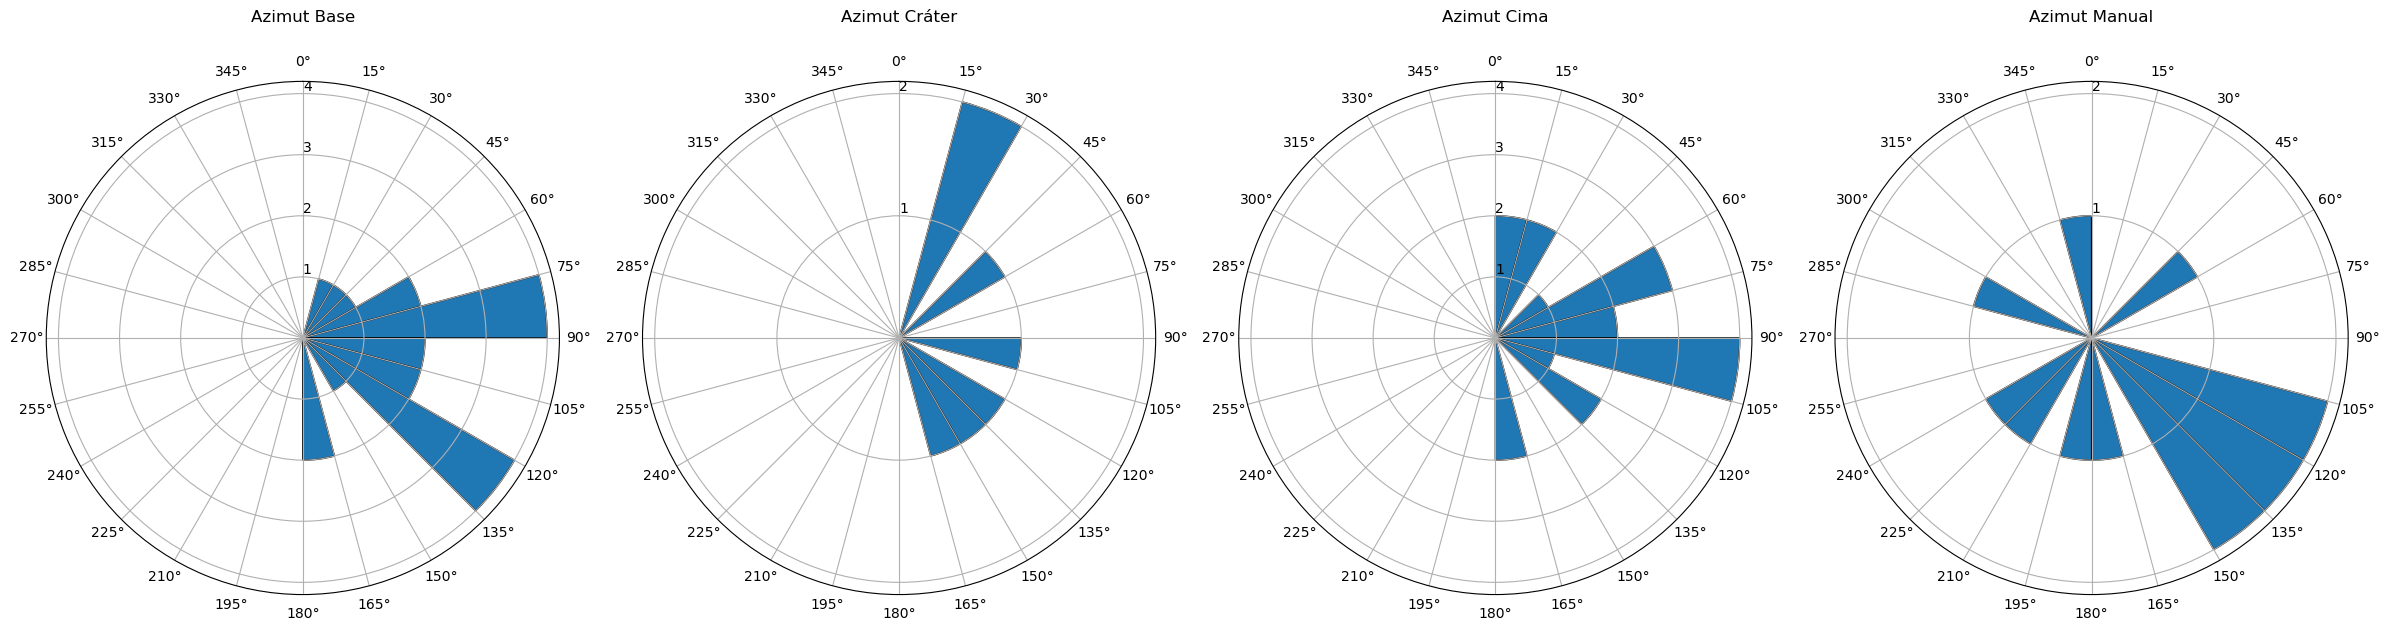

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##datos
data = {
    "Az_Base": [75, 166, 123, 60, 147, 29, 110, 129, 45, 134, 120, 97, 67, 81, 95, 179, 75, 33, None, 84, 107],
    "Az_Cr":   [None, None, 20, None, None, 123, 24, 156, 99, 57, None, None, None, None, None, None, None, 143, None, None, None],
    "Az_Cima": [125, 4, None, 170, 64, 8, 130, 103, 87, 72, 99, 172, 76, 18, 105, 22, 96, 92, None, 50, 64],
    "Az_Manual": [218, 131, 179, 141, 290, 110, 231, 359, 181, 143, 110, 51, 124, None, None, None, None, None, None, None, None]
}

df = pd.DataFrame(data)
##rose_diagram con 24 bins para que quede en secciones de 15º; conversion a radianes
def rose_diagram(ax, series, bins=24, title=''):
    azimuths = series.dropna().astype(float)
    angles = np.deg2rad(azimuths)
    bin_edges = np.linspace(0, 2*np.pi, bins + 1)##2pi para que sea 360
    counts, _ = np.histogram(angles, bins=bin_edges)##conteo

    ax.bar(bin_edges[:-1], counts, width=(2*np.pi/bins), align='edge', edgecolor='black')

    ##
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)##horario
    ax.set_title(title, y=1.1)

    ##
    max_count = int(counts.max())
    ax.set_rgrids(range(1, max_count + 1), angle=0)
    ax.set_rticks(range(1, max_count + 1))

    ##etiquetas cada 15º
    angles_deg = np.arange(0, 360, 15)
    ax.set_xticks(np.deg2rad(angles_deg))
    ax.set_xticklabels([f'{a}°' for a in angles_deg])

##plot
fig, axs = plt.subplots(1, 4, subplot_kw={'polar': True}, figsize=(24, 6))
rose_diagram(axs[0], df['Az_Base'], title='Azimut Base')
rose_diagram(axs[1], df['Az_Cr'], title='Azimut Cráter')
rose_diagram(axs[2], df['Az_Cima'], title='Azimut Cima')
rose_diagram(axs[3], df['Az_Manual'], title='Azimut Manual')
plt.tight_layout()
plt.show()


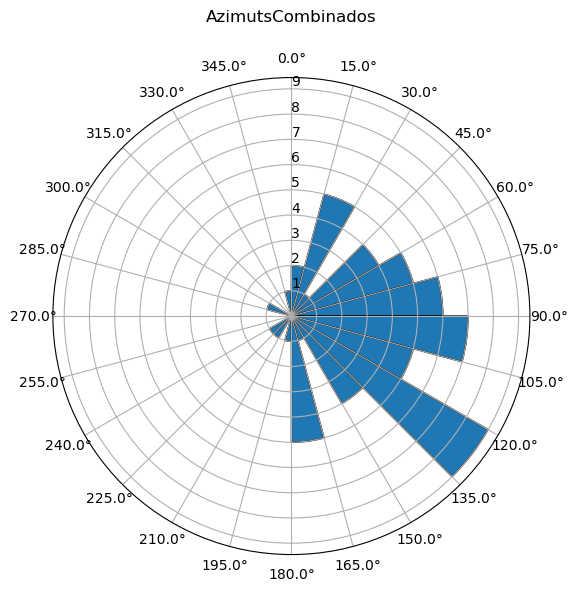

In [4]:
##combinacion de todo; concadenacion de datos
all_azimuths = pd.concat([
    df['Az_Base'],
    df['Az_Cr'],
    df['Az_Cima'],
    df['Az_Manual']
]).dropna().astype(float)

##rose_diagram con todos los azimuts; misma confguracion anterior
def rose_diagram(ax, series, bins=24, title=''):
    angles = np.deg2rad(series)
    bin_edges = np.linspace(0, 2*np.pi, bins + 1)
    counts, _ = np.histogram(angles, bins=bin_edges)

    ax.bar(bin_edges[:-1], counts, width=(2*np.pi/bins), align='edge', edgecolor='black')

    ##
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title(title, y=1.1)

    ##
    max_count = int(counts.max())
    ax.set_rgrids(range(1, max_count + 1), angle=0)
    ax.set_rticks(range(1, max_count + 1))

    ##
    angles_deg = np.arange(0, 360, 15)
    ax.set_xticks(np.deg2rad(angles_deg))
    ax.set_xticklabels([f'{a:.1f}°' for a in angles_deg])   

##plot
fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(6, 6))
rose_diagram(ax, all_azimuths, bins=24, title='AzimutsCombinados')
plt.tight_layout()

##
fig.savefig(r"C:\Users\56931\Desktop\Proyecto\orientaciones_rosas_completo.png", dpi=300, bbox_inches='tight')

plt.show()
